In [1]:
# using Pkg
# Pkg.add(url="https://github.com/sdBrinkmann/HPFilter.jl")


In [2]:
using HPFilter

using Random
using LinearAlgebra
using Statistics
using Distributions
using ProgressMeter
using SpecialFunctions
using XLSX


using Plots
using StatsPlots  
using Distributions
using DataFrames

Precompiling HPFilter
        Info Given HPFilter was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? HPFilter
[ Info: Precompiling HPFilter [d73ad930-938d-4709-8eff-50e740f82fcd]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing HPFilter [d73ad930-938d-4709-8eff-50e740f82fcd].


In [3]:

file_path = "quarterly_gdp.xlsx"
sheet_name = "Quarterly GDP"

data = XLSX.readtable(file_path, sheet_name) |> DataFrame

println(data)

num_obs = size(data, 1)
println("Number of observations: ", num_obs)


134×2 DataFrame
 Row │ Date    Value 
     │ Any     Any   
─────┼───────────────
   1 │ 1991K1  364.6
   2 │ 1991K2  364.7
   3 │ 1991K3  368.6
   4 │ 1991K4  364.5
   5 │ 1992K1  371.5
   6 │ 1992K2  367.9
   7 │ 1992K3  377.2
   8 │ 1992K4  375.4
   9 │ 1993K1  371.8
  10 │ 1993K2  370
  11 │ 1993K3  373.2
  12 │ 1993K4  375.7
  13 │ 1994K1  385.1
  14 │ 1994K2  391.5
  15 │ 1994K3  393.3
  16 │ 1994K4  399.8
  17 │ 1995K1  404.2
  18 │ 1995K2  402.5
  19 │ 1995K3  404
  20 │ 1995K4  406.7
  21 │ 1996K1  407.8
  22 │ 1996K2  418.3
  23 │ 1996K3  419
  24 │ 1996K4  419.1
  25 │ 1997K1  424.8
  26 │ 1997K2  431.6
  27 │ 1997K3  429.7
  28 │ 1997K4  430.9
  29 │ 1998K1  437.5
  30 │ 1998K2  434
  31 │ 1998K3  441.2
  32 │ 1998K4  444.1
  33 │ 1999K1  447.8
  34 │ 1999K2  449.8
  35 │ 1999K3  451.7
  36 │ 1999K4  459.7
  37 │ 2000K1  462.9
  38 │ 2000K2  468.1
  39 │ 2000K3  468.9
  40 │ 2000K4  476.5
  41 │ 2001K1  469.1
  42 │ 2001K2  472.2
  43 │ 2001K3  475.3
  44 │ 2001K4  477.7
  

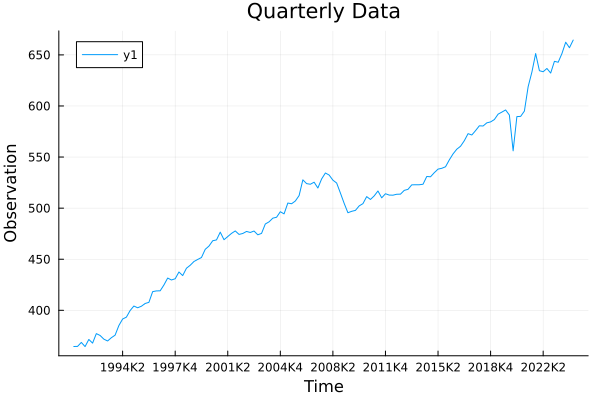

In [4]:
y = data[:, 2]
# y = log.(y)
dates = data[:, 1]

# Plot the data
plot(dates,y, title="Quarterly Data", xlabel="Time", ylabel="Observation")

## Apply HP and Butterworth filters

In [5]:
# HP filter with λ = 1600
hp = HP(y, 1600)
println(size(hp))

# Boosted HP filter with baysian-type information criterion (BIC)
bHP_bic = bHP(y, 1600, Criterion="BIC")


(134,)
Number of iterations = 9


134-element Vector{Float64}:
 363.9175388712792
 365.04573919203443
 366.18629365625446
 367.3561217195108
 368.5902426799897
 369.91018255778783
 371.3545510273717
 372.94962390342926
 374.75196163056654
 376.8279461609132
 379.2223396681185
 381.93588058352486
 384.92975684761655
   ⋮
 617.5848507503642
 622.7085228996116
 627.5453066388694
 632.1077172396875
 636.4511019112671
 640.6432455501762
 644.7581397911259
 648.8268005253249
 652.8782450573401
 656.9108069928574
 660.9163433188295
 664.9191043265323

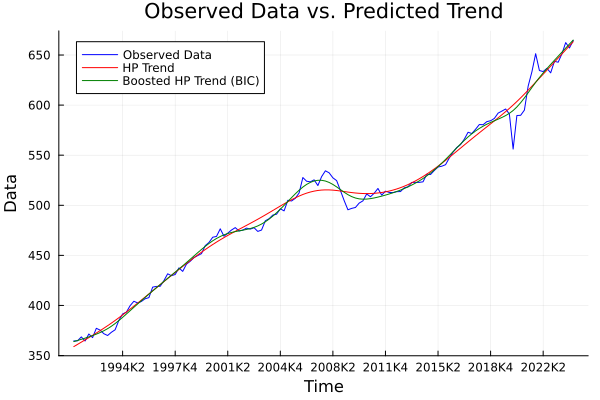

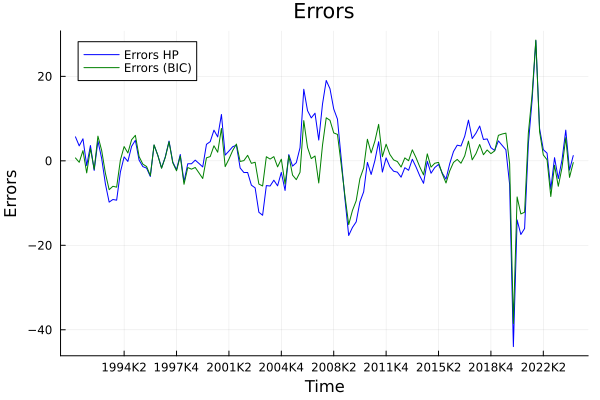

In [6]:






y_pred = hp


p = plot(dates, y, label="Observed Data", color=:blue)
plot!(p, dates, hp, label="HP Trend", color=:red)
xlabel!("Time")
ylabel!("Data")
title!("Observed Data vs. Predicted Trend")
plot!(p, dates, bHP_bic, label="Boosted HP Trend (BIC)", color=:green)
# plot!(p, dates, bHP_adf, label="Boosted HP Trend (ADF)", color=:purple)

display(p)


cycle_hp = y .- hp
cycle_hp_bic = y .- bHP_bic
# errors3 = y .- bHP_adf


p_error = plot(dates, cycle_hp, label="Errors HP", color=:blue)
plot!(p_error, dates, cycle_hp_bic, label="Errors (BIC)", color=:green)
# plot!(p_error, dates, errors3, label="Errors (ADF)", color=:purple)
xlabel!("Time")
ylabel!("Errors")
title!("Errors")
display(p_error)


In [7]:
# import Pkg; Pkg.add("DSP")

In [8]:
using DSP  # For digital signal processing functions
using Plots  # For plotting (optional)



fs = 4  # Replace with the appropriate value for your data

N = 12  # Number of periods for the cutoff
fc = fs / N  # Cutoff frequency in the same units as fs

# Ensure the cutoff frequency is valid
if fc >= fs / 2
    error("Cutoff frequency must be less than half the sampling frequency")
end

# Define the filter order
order = 4  # Adjust as needed

# Design the Butterworth low-pass filter
responsetype = Lowpass(fc; fs=fs)
designmethod = Butterworth(order)
butter_filter = digitalfilter(responsetype, designmethod)

# Apply the filter to your data using filtfilt to avoid phase distortion
trend_butterworth = filtfilt(butter_filter, y)

# Output the size of the trend component
println(size(trend_butterworth))

# (Optional) Plot the original data and the extracted trend
plot(dates, y, label="Original Data")
plot!(dates, trend_butterworth, label="Trend (Butterworth Filtered)")

cycle_butterworth = y .- trend_butterworth


(134,)


134-element Vector{Float64}:
  -0.19024317461872897
  -1.3994872706538786
   1.2921375436303606
  -3.8590969111996287
   2.2665744789809423
  -2.0688677412570655
   6.524589330520428
   3.8680053980163507
  -0.9579032579089812
  -4.559313454227208
  -3.86568777415647
  -4.580676049424255
   1.0299665995439113
   ⋮
  11.446711600737103
  22.390936569101086
   0.044735660667129196
  -4.851213884001822
  -4.247623182165853
 -10.630526721086994
  -0.9316798870734146
  -4.070123801764794
   1.437738497093278
   8.69518677474423
  -1.3101037161350177
   1.0364056702570679

## Load results from STMs

In [9]:
using JLD2

@load "states_harvey.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey = alpha_mean
alpha_lower_harvey = alpha_lower
alpha_upper_harvey = alpha_upper

@load "states_harvey_in_kim.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey_in_kim = alpha_mean
alpha_lower_harvey_in_kim = alpha_lower
alpha_upper_harvey_in_kim = alpha_upper

@load "states_kim_nelson.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_kim_nelson = alpha_mean
alpha_lower_kim_nelson = alpha_lower
alpha_upper_kim_nelson = alpha_upper

@load "states_harvey_filter.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey_filter = alpha_mean
alpha_lower_harvey_filter = alpha_lower
alpha_upper_harvey_filter = alpha_upper



134×6 Matrix{Float64}:
 364.6    0.0         0.0         0.0          0.0         0.0
 364.623  0.0126666   0.0377141  -0.00013708   0.0618211   0.00120843
 366.042  0.671308    1.52984    -0.00332444   2.78154     0.415028
 365.431  0.164151    0.0139199  -0.00657348   0.899499   -0.025664
 368.593  1.21685     2.18127     0.0472774    4.50723     1.0823
 368.329  0.743752    0.610805   -0.00890453   3.72269    -0.0236328
 373.647  2.11928     3.56416     0.201551     8.61648     2.54332
 374.751  1.82723     2.29197    -0.00546362   9.66495     0.902542
 373.309  0.960331    0.500878   -0.0173426    7.72153    -0.0754763
 372.292  0.658313   -0.217982   -0.00849571   5.50716    -0.120524
 374.373  0.988728    1.1421      0.168432     5.85127    -0.0284002
 376.662  1.30576     2.06332     0.235977     7.40656     1.24278
 382.854  2.60168     4.84769     0.580116    12.3708      5.20942
   ⋮                                                       ⋮
 626.834  7.37381    10.2474      1.8

## Plot cycle

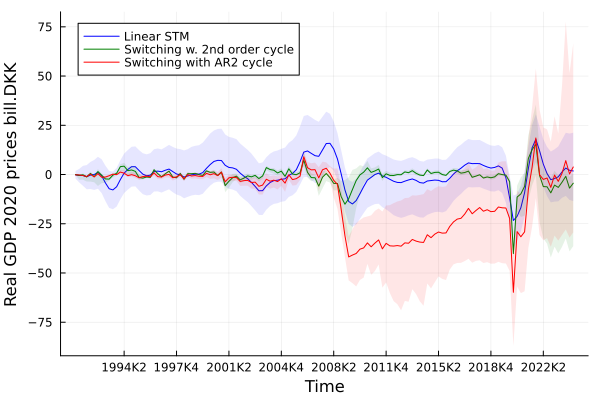

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\Estimated_Cycles_from_SSMs.pdf"

In [29]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_in_kim[:, 5], label="Switching w. 2nd order cycle",
        ribbon=(alpha_mean_harvey_in_kim[:, 5] .- alpha_lower_harvey_in_kim[:, 5],
                alpha_upper_harvey_in_kim[:, 5] .- alpha_mean_harvey_in_kim[:, 5]),
        fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, alpha_mean_kim_nelson[:, 3], label="Switching with AR2 cycle",
        ribbon=(alpha_mean_kim_nelson[:, 3] .- alpha_lower_kim_nelson[:, 3],
                alpha_upper_kim_nelson[:, 3] .- alpha_mean_kim_nelson[:, 3]),
        fillalpha=0.1, color=:red)

# # Plot Harvey Filter estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Harvey Filter Estimate",
#         ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
#                 alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
#         fillalpha=0.1, color=:purple)


# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

#save
savefig(p, "Estimated_Cycles_from_SSMs.pdf")



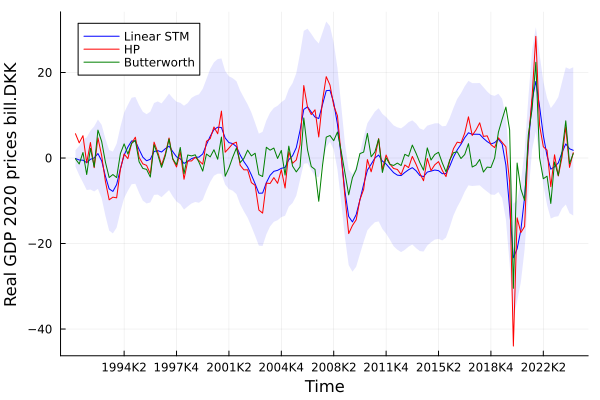

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\Estimated_Linear_Cycles.pdf"

In [34]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# # Plot Harvey filtered estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Harvey Filter Estimate", color=:purple)
#         # ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
#         #         alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
#         # fillalpha=0.1, color=:purple)

# Plot HP-filtered data
plot!(p, dates, cycle_hp, label="HP", color=:red)

# Plot Butterworth-filtered data
plot!(p, dates, cycle_butterworth, label="Butterworth", color=:green)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Linear_Cycles.pdf")



### Plot trend and real data

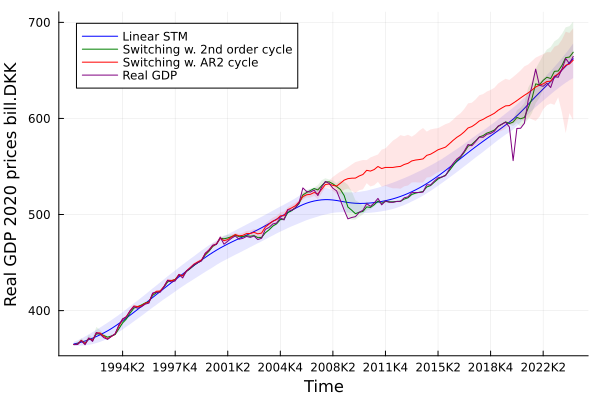

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\Estimated_Trends_from_SSMs.pdf"

In [27]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_in_kim[:, 1], label="Switching w. 2nd order cycle",
        ribbon=(alpha_mean_harvey_in_kim[:, 1] .- alpha_lower_harvey_in_kim[:, 1],
                alpha_upper_harvey_in_kim[:, 1] .- alpha_mean_harvey_in_kim[:, 1]),
        fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, alpha_mean_kim_nelson[:, 1], label="Switching w. AR2 cycle",
        ribbon=(alpha_mean_kim_nelson[:, 1] .- alpha_lower_kim_nelson[:, 1],
                alpha_upper_kim_nelson[:, 1] .- alpha_mean_kim_nelson[:, 1]),
        fillalpha=0.1, color=:red)

plot!(p, dates, y, label="Real GDP", color=:purple)


# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Trends_from_SSMs.pdf")



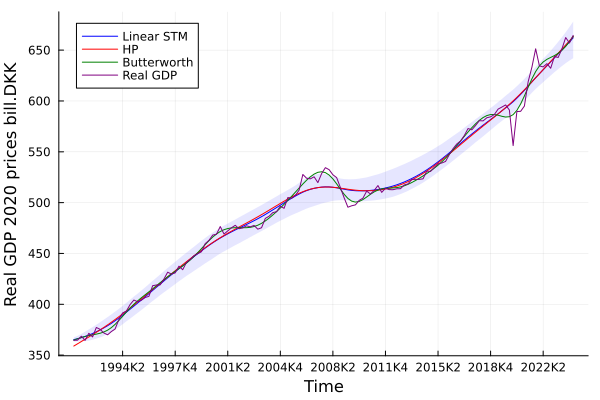

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\Estimated_Linear_Trends.pdf"

In [33]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# # Plot Harvey filtered estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 1], label="Harvey Filter Estimate", color=:purple)
#         # ribbon=(alpha_mean_harvey_filter[:, 1] .- alpha_lower_harvey_filter[:, 1],
#         #         alpha_upper_harvey_filter[:, 1] .- alpha_mean_harvey_filter[:, 1]),
#         # fillalpha=0.1, color=:purple)

# Plot HP-filtered data
plot!(p, dates, hp, label="HP", color=:red)

# Plot Butterworth-filtered data
plot!(p, dates, trend_butterworth, label="Butterworth", color=:green)


plot!(p, dates, y, label="Real GDP", color=:purple)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Linear_Trends.pdf")


### Trend deviaten from real data

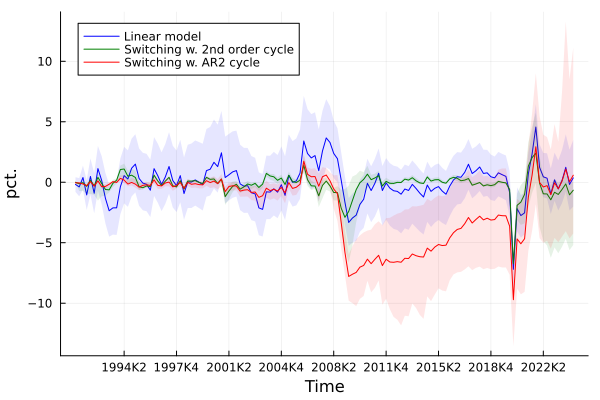

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\cycles.pdf"

In [ ]:
p = plot(xlabel="Time", ylabel="pct.")

# Plot Harvey estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1] *100, label="Linear STM",
      ribbon=((y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1]*100 .- (y .- alpha_lower_harvey[:, 1]) ./ alpha_lower_harvey[:, 1]*100,
              (y .- alpha_upper_harvey[:, 1]) ./ alpha_upper_harvey[:, 1]*100 .- (y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1]*100),
      fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100, label="Switching w. 2nd order cycle",
      ribbon=((y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100 .- (y .- alpha_lower_harvey_in_kim[:, 1]) ./ alpha_lower_harvey_in_kim[:, 1]*100,
              (y .- alpha_upper_harvey_in_kim[:, 1]) ./ alpha_upper_harvey_in_kim[:, 1]*100 .- (y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100),
      fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100, label="Switching w. AR2 cycle",
      ribbon=((y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100 .- (y .- alpha_lower_kim_nelson[:, 1]) ./ alpha_lower_kim_nelson[:, 1]*100,
              (y .- alpha_upper_kim_nelson[:, 1]) ./ alpha_upper_kim_nelson[:, 1]*100 .- (y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100),
      fillalpha=0.1, color=:red)

# # Plot reference line for Real GDP at zero deviation
# plot!(p, dates, 0 .* y, label="Real GDP", color=:purple)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

# Save the plot as a PDF
savefig(p, "cycles.pdf")


### Recesion probability switching models

In [15]:
@load "p_res_mean_harvey_in_kim.jld2" p_res_mean

p_res_mean_harvey_in_kim = p_res_mean

@load "p_res_mean_kim_nelson.jld2" p_res_mean

p_res_mean_kim_nelson = p_res_mean

134-element Vector{Float64}:
 0.1144512547667043
 0.06569029948255599
 0.03688098165719907
 0.03860649165334704
 0.03913770730655727
 0.02953141571398831
 0.06178924152040869
 0.028153607462222213
 0.045685680961243307
 0.03035178108074581
 0.017842693073022258
 0.014830005009727117
 0.0907866098200495
 ⋮
 0.9931815042876202
 0.9942857376818978
 0.991101804528614
 0.7611746095174844
 0.31964404981663924
 0.2842999175383576
 0.32494499218463396
 0.12638043863999432
 0.09035982699950251
 0.28419391944991773
 0.254561162909278
 0.11311843132715563

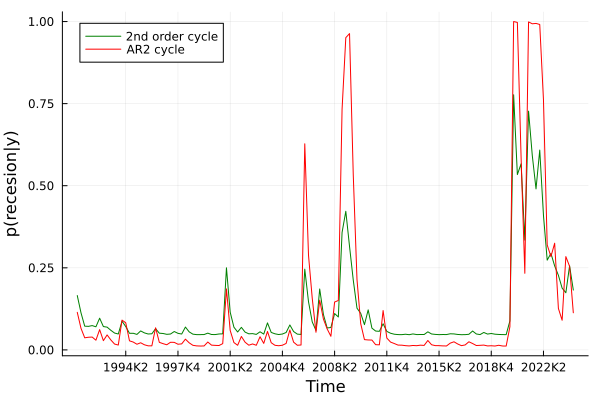

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\p_recesion.pdf"

In [24]:

p = plot(xlabel="Time", ylabel="p(recesion|y)")

plot!(p, dates, p_res_mean_harvey_in_kim, label="2nd order cycle", color=:green)
plot!(p, dates, p_res_mean_kim_nelson, label="AR2 cycle", color=:red)

display(p)

savefig(p, "p_recesion.pdf")

### Smoothed vs Filtered Harvey

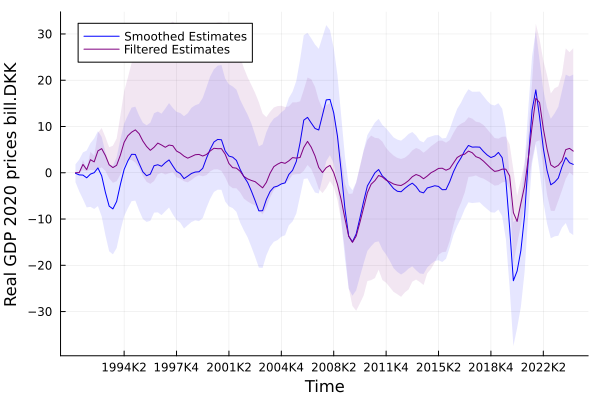

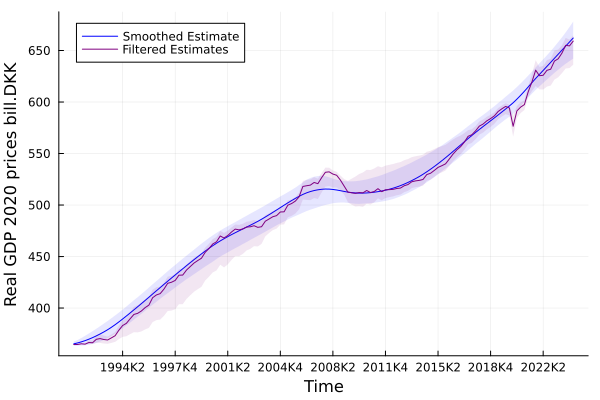

"c:\\Users\\marti\\OneDrive - University of Copenhagen\\Økonomi\\9. semester\\Empirical macro\\State-Space-Model-Estimation-1\\results\\trend_smoothvfiltered.pdf"

In [19]:
# plot harvey filtered and harvey
#cycle
p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Smoothed Estimates",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# Plot Harvey Filter estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Filtered Estimates",
        ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
                alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
        fillalpha=0.1, color=:purple)

display(p)

savefig(p, "cycle_smoothvfiltered.pdf")

#trend
p = plot( xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Smoothed Estimate",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# Plot Harvey Filter estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_filter[:, 1], label="Filtered Estimates",
        ribbon=(alpha_mean_harvey_filter[:, 1] .- alpha_lower_harvey_filter[:, 1],
                alpha_upper_harvey_filter[:, 1] .- alpha_mean_harvey_filter[:, 1]),
        fillalpha=0.1, color=:purple)

display(p)

savefig(p, "trend_smoothvfiltered.pdf")
